learning rate experiments ran on 20221215 - using 100%, 75%, 50%, 25%, and 10% of dataset

# 1

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

results_path = "/home/alex/datasets/hparam_results/hparam_results"

In [3]:
trial_id = "lr_opt_20221109_mnist"

In [6]:
all_folders = os.listdir(os.path.join(results_path, trial_id))
trial = all_folders[1]

In [7]:
trial

'train_func_530f9_00015_15_lr=0.0002_2022-12-16_07-23-06'

In [11]:
trial_path

['result.json',
 'params.pkl',
 'params.json',
 'events.out.tfevents.1671175386.36b038aad980',
 'progress.csv']

In [14]:

with open(os.path.join(results_path, trial_id, trial, "result.json"), "r") as f:
    result = json.load(f)

In [15]:
result

{'val_loss': 0.02390584908425808,
 'time_this_iter_s': 22.861937761306763,
 'done': True,
 'timesteps_total': None,
 'episodes_total': None,
 'training_iteration': 1,
 'trial_id': '530f9_00015',
 'experiment_id': '86f79ad91d834666bfb39fd30e64ecc1',
 'date': '2022-12-16_07-23-29',
 'timestamp': 1671175409,
 'time_total_s': 22.861937761306763,
 'pid': 113512,
 'hostname': '36b038aad980',
 'node_ip': '172.17.0.2',
 'config': {'model_cfg': {'model_id': 'CNN2',
   'args': {'in_channels': 1,
    'n_classes': 10,
    'input_shape': [28, 28],
    'ch1': 8,
    'ch2': 16,
    'ch3': 64,
    'lin1': 128,
    'batch_norm': True,
    'dropout': True}},
  'data_cfg': {'dataset_id': 'mnist',
   'train': True,
   'batch_size': 32,
   'num_workers': 8,
   'use_precomputed_split': True,
   'workdir': '/home/projects/hparam_project',
   'split_id': 'mnist'},
  'loss_cfg': {'loss_id': 'bce_with_logits_loss', 'args': None},
  'optimizer_cfg': {'optimizer_id': 'adam',
   'args': {'lr': 0.000158157694002010

In [23]:
csv_path = os.path.join(results_path, trial_id, "results_lr_opt_20221109_mnist.csv")
results_df = pd.read_csv(csv_path, index_col=0)

Text(0, 0.5, 'validation loss')

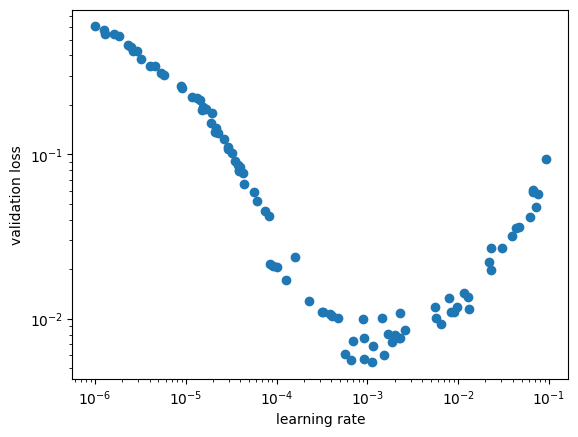

In [31]:
lr = results_df['config/optimizer_cfg/args/lr']
val_loss = results_df['val_loss']

fig, ax = plt.subplots()
ax.scatter(lr, val_loss)
ax.set_yscale('log')
ax.set_xscale("log")
ax.set_xlabel("learning rate")
ax.set_ylabel("validation loss")

# 2 visualizing all other results

In [44]:
trial_ids = os.listdir(results_path)

all_trial_dfs = []
for t_id in trial_ids:
    all_folders = os.listdir(os.path.join(results_path, t_id))
    for folder in all_folders:
        if ".csv" in folder:
            csv_folder = folder
            break
    trial_data = pd.read_csv(
        os.path.join(results_path, t_id, csv_folder),
        index_col=0)
    all_trial_dfs.append(trial_data)

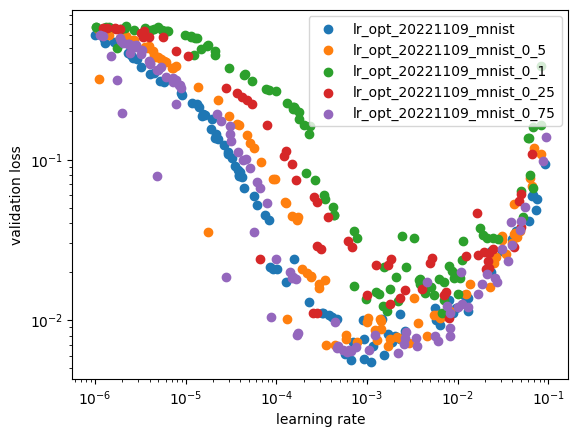

In [45]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale("log")
ax.set_xlabel("learning rate")
ax.set_ylabel("validation loss")

for df, t_id in zip(all_trial_dfs, trial_ids):
    lr = df['config/optimizer_cfg/args/lr']
    val_loss = df['val_loss']
    ax.scatter(lr, val_loss, label=t_id)
ax.legend()

# 3 clean up results


- take the 10 lowest losses and do bar plot

Text(0.5, 1.0, 'learning rate vs. loss for best 20 trials')

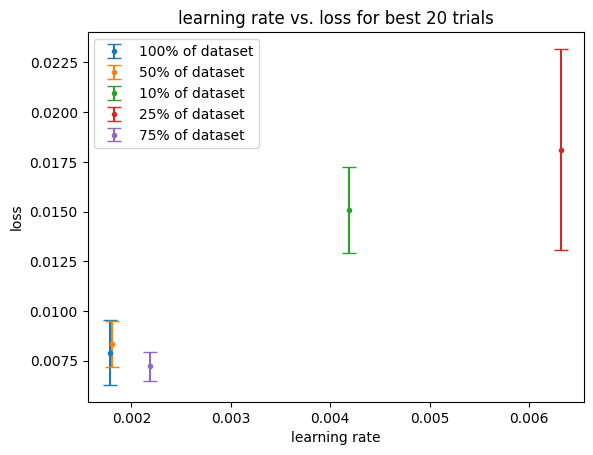

In [69]:
dataset_subsets = {
    '': '100',
    '_0_5': '50',
    '_0_1': '10',
    '_0_25': '25',
    '_0_75': '75'
}

fig, ax = plt.subplots()

avgs_loss = []
avgs_lr = []
stds_loss = []
stds_lr = []
perts = []

num_best_trials =  20

for t_id, df in zip(trial_ids, all_trial_dfs):
    percentage = dataset_subsets[t_id.split("mnist")[1]]

    val_loss = df.sort_values(
        by='val_loss').head(
        num_best_trials)['val_loss']
    lr = df.sort_values(
        by='val_loss').head(
        num_best_trials)['config/optimizer_cfg/args/lr']
    

    ax.errorbar(y=np.mean(val_loss),
                x=np.mean(lr),
                yerr=np.std(val_loss),
                #xerr=np.std(lr),
                fmt='.',
                capsize=5,
                label=f"{percentage}% of dataset"
                )
    
ax.legend()
ax.set_xlabel("learning rate")
ax.set_ylabel("loss")
ax.set_title(f"learning rate vs. loss for best {num_best_trials} trials")


- 10% and 25% have nearly double and triple the best learning rate compared to full dataset
- 75% is further off from 50%, so it may be the case that you could get within a margin of error by cutting the dataset in half

# Next Steps

- try with another dataset and another model
- cifar10 + cnn2
- mnist + resnet18
- cifar10 + resnet18